<a href="https://colab.research.google.com/github/Bhavana130/LGMVIP-DataScience/blob/main/Intermediate_Level/Global_terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
 
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding='latin1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970.0,7.0,2.0,NaN,0.0,NaN,58.0,Dominican Republic,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970.0,0.0,0.0,NaN,0.0,NaN,130.0,Mexico,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970.0,1.0,0.0,NaN,0.0,NaN,160.0,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970.0,1.0,0.0,NaN,0.0,NaN,78.0,Greece,8.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970.0,1.0,0.0,NaN,0.0,NaN,101.0,Japan,4.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df.shape

(29975, 135)

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
#Renaming the columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                   'region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude',
                   'attacktype1_txt':'AttackType','targtype1_txt':'TargetType','targsubtype1_txt':'TargetSubType',
                  'weaptype1_txt':'WeaponType','gname':'Group','nkill':'Killed','nwound':'Wounded','summary':'Summary','motive':'Motive'},inplace=True)


In [ ]:
df=df[['eventid','Year','Month','Day','Country','State','Region','City','Latitude','Longitude','AttackType','TargetType','TargetSubType'
,'suicide','Killed','Wounded','Summary','Group','WeaponType','Motive']]

In [ ]:
#Seeing First Five Entries
df.head()

,eventid,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,TargetType,TargetSubType,suicide,Killed,Wounded,Summary,Group,WeaponType,Motive
0,197000000001,1970.0,7.0,2.0,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Named Civilian,0.0,1.0,0.0,NaN,MANO-D,Unknown,NaN
1,197000000002,1970.0,0.0,0.0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",0.0,0.0,0.0,NaN,23rd of September Communist League,Unknown,NaN
2,197001000001,1970.0,1.0,0.0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,0.0,1.0,0.0,NaN,Unknown,Unknown,NaN
3,197001000002,1970.0,1.0,0.0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,0.0,NaN,NaN,NaN,Unknown,Explosives,NaN
4,197001000003,1970.0,1.0,0.0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,0.0,NaN,NaN,NaN,Unknown,Incendiary,NaN


In [ ]:
df.describe()

,eventid,Year,Month,Day,Latitude,Longitude,suicide,Killed,Wounded
count,2.997500e+04,29974.000000,29974.000000,29974.000000,28397.000000,2.839700e+04,29974.000000,24447.000000,22698.000000
mean,1.980791e+11,1980.792086,6.350404,15.175952,19.813379,-3.067458e+03,0.000934,2.194380,1.712221
std,1.214180e+09,4.065549,3.398355,8.881986,25.440026,5.114460e+05,0.030550,9.497849,11.478994
min,1.980000e+02,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1.979013e+11,1979.000000,3.000000,8.000000,6.313712,-8.304792e+01,0.000000,0.000000,0.000000
50%,1.981121e+11,1981.000000,6.000000,15.000000,15.030000,-6.606113e+01,0.000000,0.000000,0.000000
75%,1.984071e+11,1984.000000,9.000000,23.000000,41.733244,9.174508e+00,0.000000,1.000000,0.000000
max,1.987012e+11,1987.000000,12.000000,31.000000,64.837778,1.747763e+02,1.000000,422.000000,751.000000


Text(0, 0.5, 'Incidents')

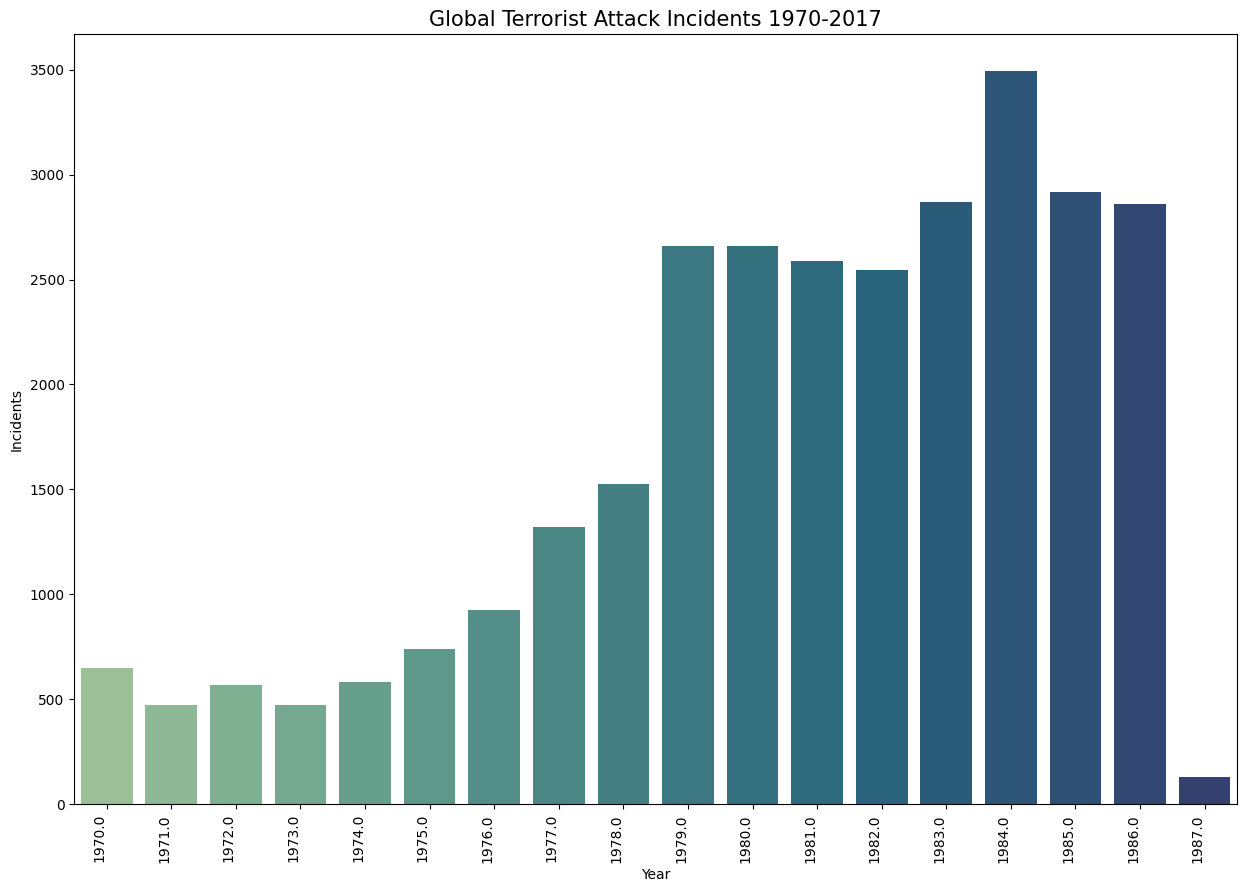

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='Year',data=df,palette='crest')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Global Terrorist Attack Incidents 1970-2017',size=15)
plt.ylabel('Incidents')

Text(0, 0.5, 'Count of Year')

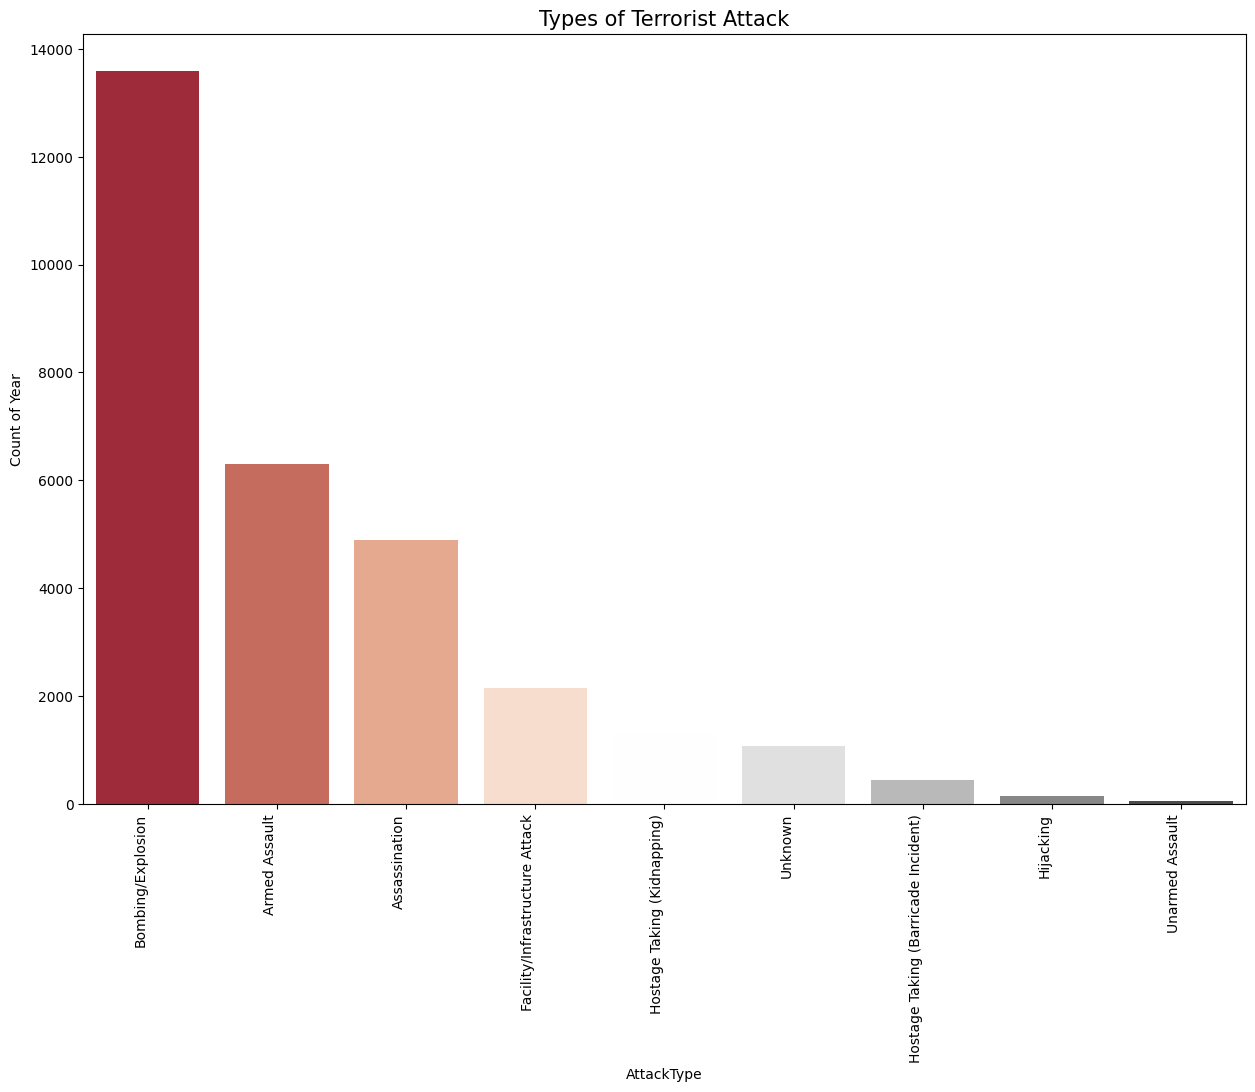

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='AttackType',data=df,palette='RdGy',order = df['AttackType'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Types of Terrorist Attack',size=15)
plt.ylabel('Count of Year')

In [ ]:
df_bombing = df[df['AttackType'] == 'Bombing/Explosion']

Text(-3.6805555555555483, 0.5, 'Incidents')

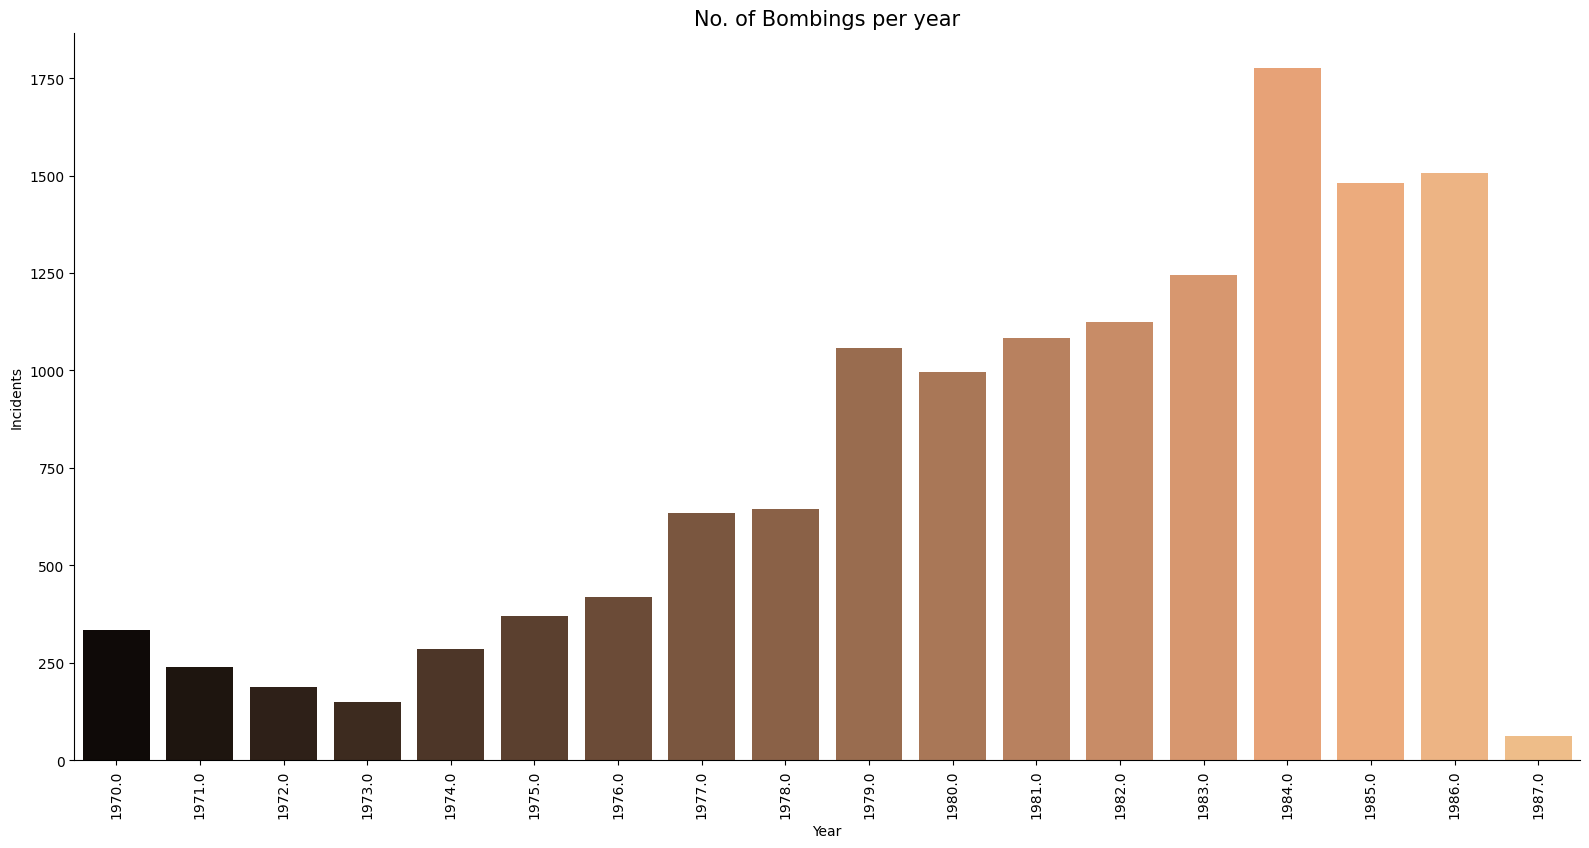

In [ ]:
sns.catplot(x='Year',data=df_bombing,kind='count',height=8, aspect=2,palette='copper')
plt.xticks(rotation=90)
plt.title('No. of Bombings per year',size=15)
plt.ylabel('Incidents')

Text(0, 0.5, 'No. of Attacks')

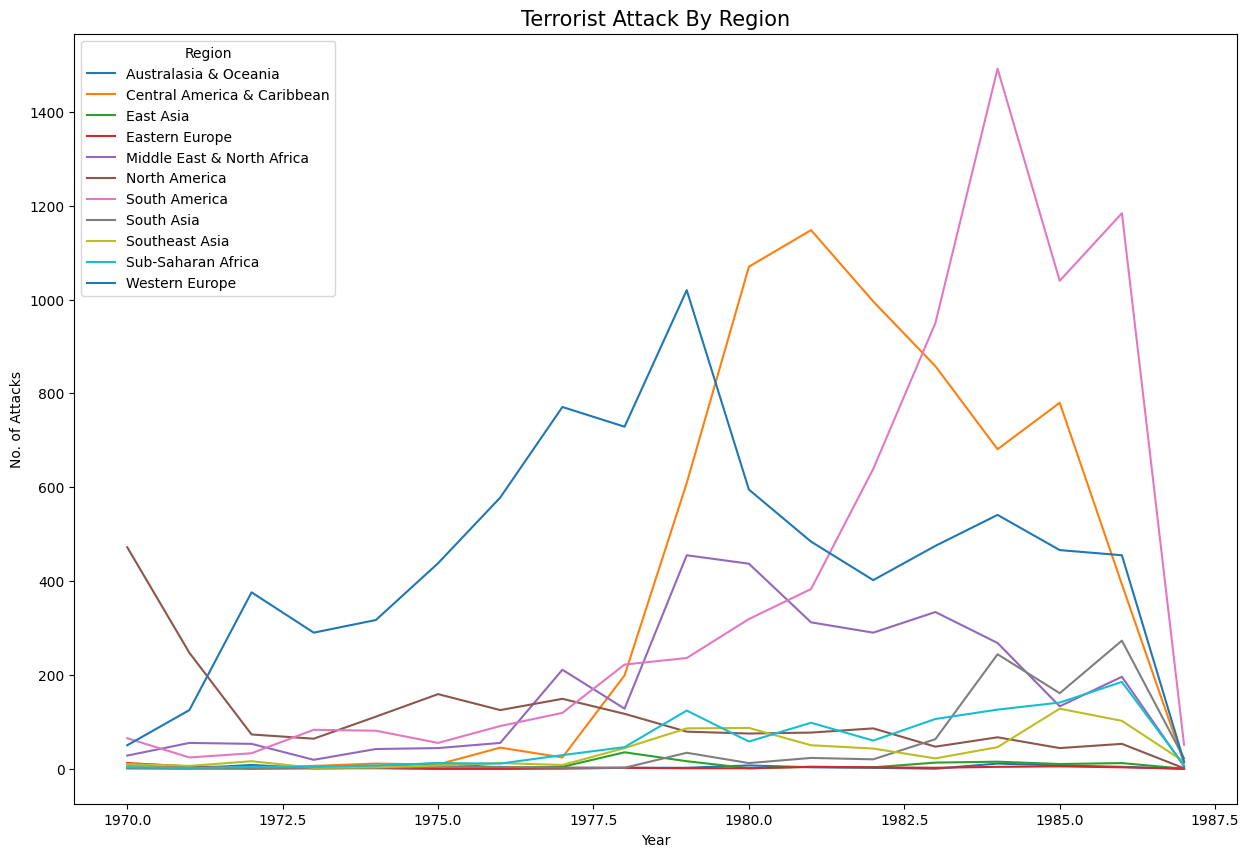

In [ ]:
pd.crosstab(df.Year,df.Region).plot(figsize=(15,10))
plt.title('Terrorist Attack By Region',size=15)
plt.ylabel('No. of Attacks')

Text(0.5, 1.0, 'Top-10:Total Attacks by Country')

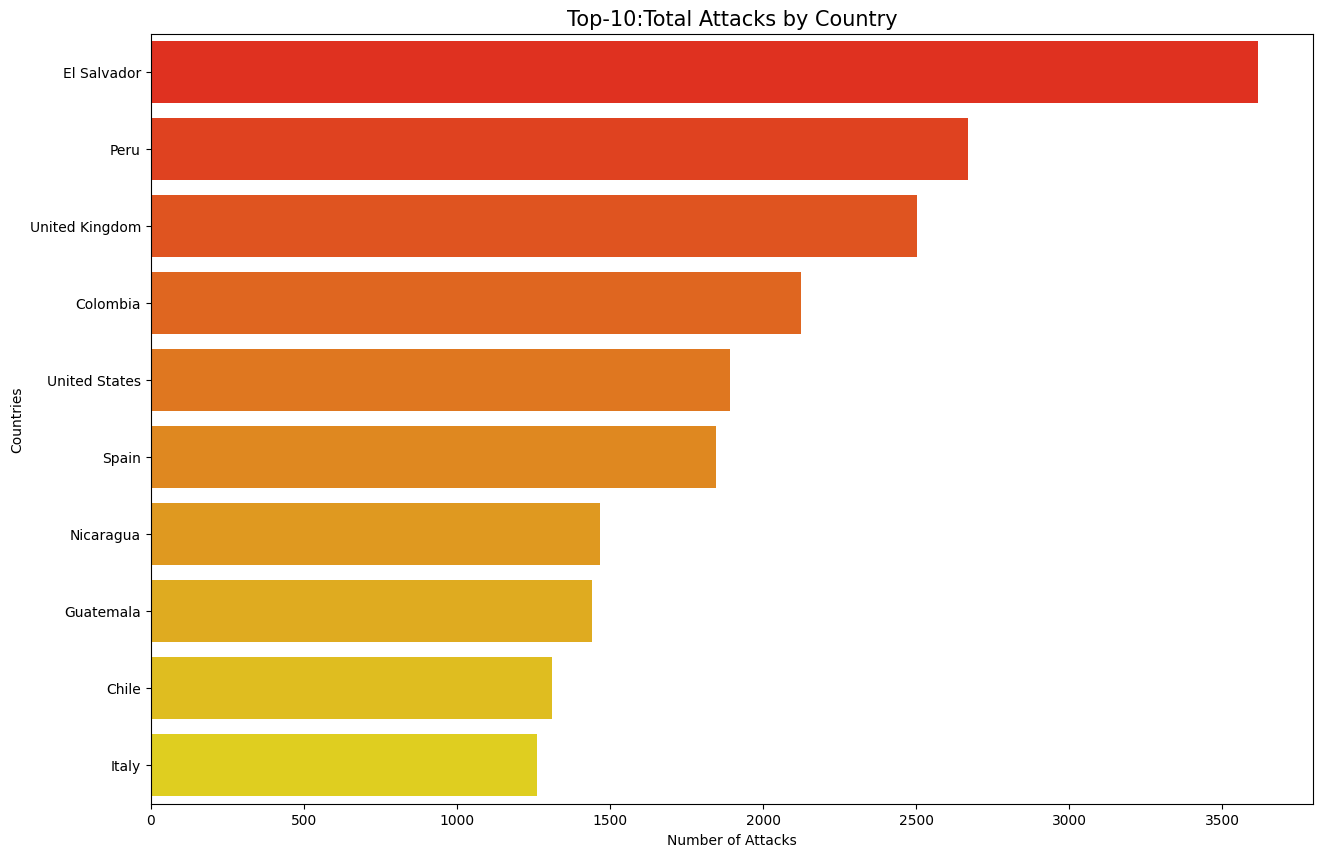

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = df['Country'].value_counts().values[:10], y = df['Country'].value_counts()[:10].index,palette = 'autumn')
plt.xlabel('Number of Attacks')
plt.ylabel('Countries')
plt.title('Top-10:Total Attacks by Country',size=15)